Task 3 - Iris Flower Classification
Domain - Data Science
Batch - April Batch A46


In [1]:
#Importing all the necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#Loading the Dataset 
dt = pd.read_csv("IRIS.csv")

In [4]:
#Retriving the first 5 rows from the dataset 
dt.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dt.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#Finding Out the Null Values present in the dataset
dt.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# to display no. of samples on each class
dt['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'sepal Length Distribution')

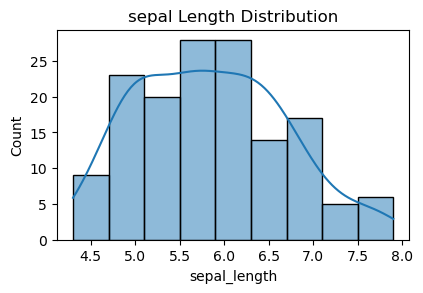

In [13]:
#Visualization of sepal length distribution across the 3 flowers
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(dt['sepal_length'], kde=True)
plt.title('sepal Length Distribution')

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'sepal Width Distribution')

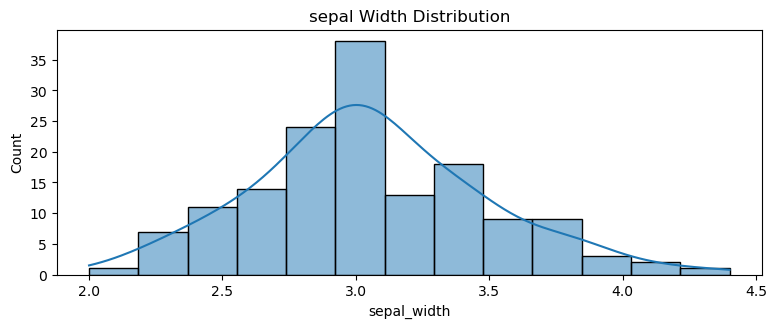

In [16]:
#Visualization of sepal width distribution across the 3 flowers
plt.figure(figsize=(20,7))
plt.subplot(2, 2, 2)
sns.histplot(dt['sepal_width'], kde=True)
plt.title('sepal Width Distribution')

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

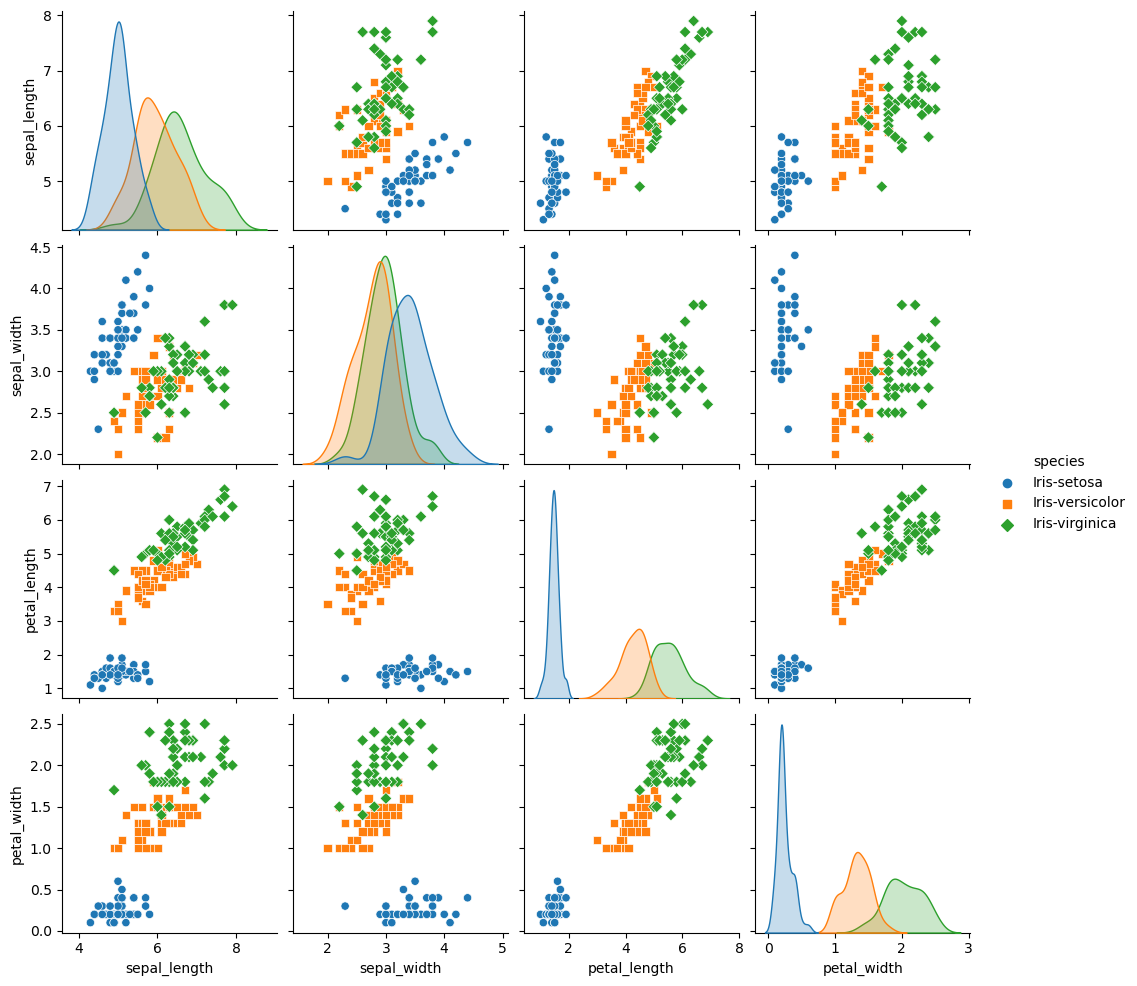

In [22]:
sns.pairplot(dt, hue='species', markers=['o', 's', 'D'])
plt.show()

<Axes: >

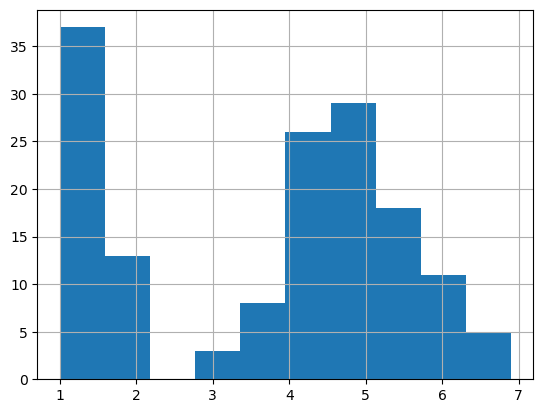

In [27]:
#Visualization of Petal Length using Histogram
dt['petal_length'].hist()

<Axes: >

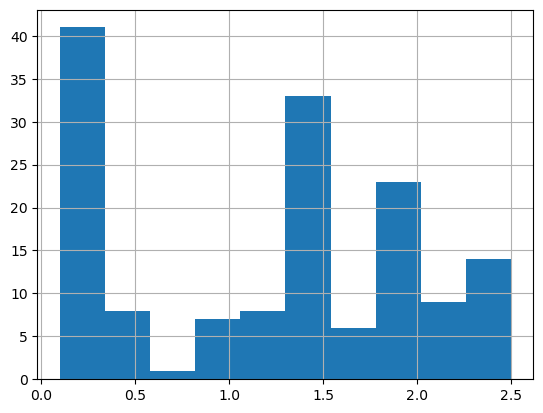

In [29]:
#Visualization of Petal Width using Histogram
dt['petal_width'].hist()

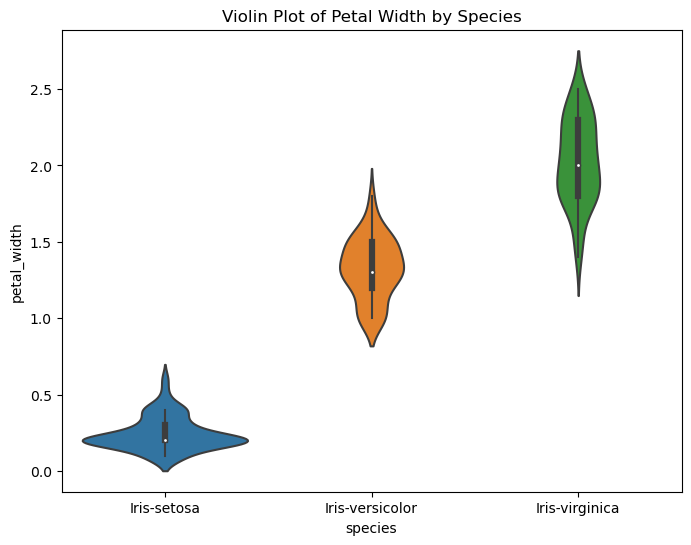

In [31]:
#Violin Plot to Visualize Petal Width by Species
plt.figure(figsize=(8, 6))
sns.violinplot(data=dt, x='species', y='petal_width')
plt.title('Violin Plot of Petal Width by Species')
plt.show()

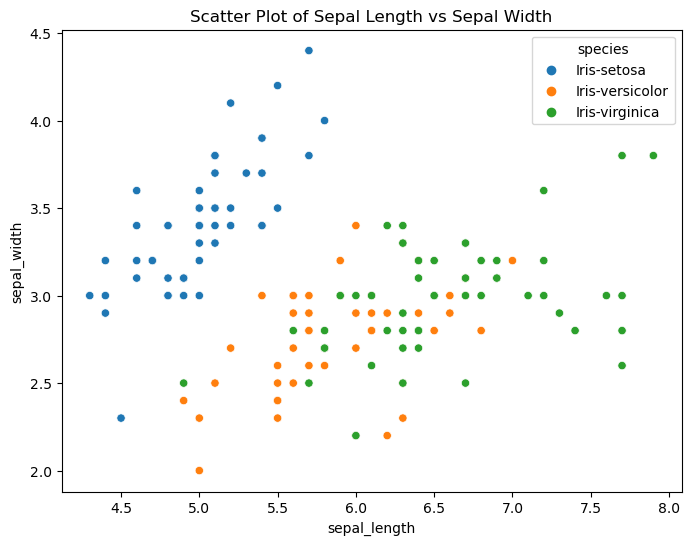

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dt, x='sepal_length', y='sepal_width', hue='species')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

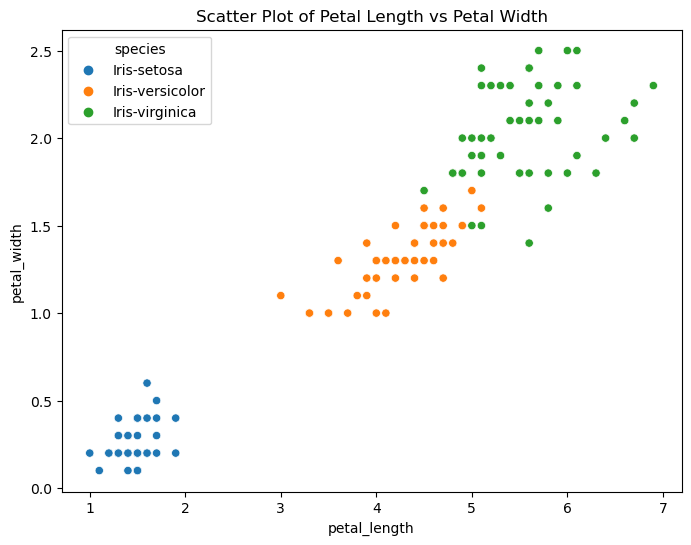

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dt, x='petal_length', y='petal_width', hue='species')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [11]:
#Splitting the dataset into train and test sets
x = dt.drop(columns=['species'])
y = dt['species']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
#making sure that all our features have similar scales (mean and standard deviation).
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
y_pred_dt = dt_model.predict(x_test_scaled)

In [19]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [20]:
#Accuracy Rate of the Decision Tree Model
accuracy_dt

0.8666666666666667

In [24]:
from sklearn.svm import SVC

In [26]:
svm_model = SVC(kernel='rbf', random_state=42)  # Using radial basis function kernel
svm_model.fit(x_train_scaled, y_train)

SVC(random_state=42)

In [27]:
y_pred_svm = svm_model.predict(x_test_scaled)

In [28]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [29]:
#Accuracy of the SVM Model 
accuracy_svm

0.9555555555555556

In [ ]:
#Clearly the Accuracy Rate of 